In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmaps
import scipy.stats as stats
import scipy as sp

import getdist
from getdist import plots, MCSamples, loadMCSamples
from astropy.io import fits
from vega import VegaInterface, Wedge
from vega.parameters.param_utils import build_names
%matplotlib inline

In [2]:
def make_chain(names, mean, cov):
    labels = build_names(names)
    gaussian_samples = np.random.multivariate_normal(mean, cov, size=1000000)
    samples = MCSamples(samples=gaussian_samples, names = names, labels = [labels[name] for name in names])
    return samples

def get_res(path):
    hdul = fits.open(path)
    res = {}
    res['chisq'] = hdul[2].header['FVAL']
    res['mean'] = [val for val in hdul[2].data['values']]
    res['cov'] = hdul[2].data['covariance']
    npars = len(hdul[2].data['names'])
    res['pars'] = {hdul[2].data['names'][i]:{'val':hdul[2].data['values'][i], 'err':hdul[2].data['errors'][i]} for i in range(npars)}
    
    chain = make_chain(res['pars'].keys(), res['mean'], res['cov'])
    return res, chain

Run main.ini files in the terminal to get fits files for the different mock/model combinations. Auto indicates it's an auto correlation and cross is a cross correlation. There are three mocks being evaluated, no HCDs (baseline); HCDs -> 17 (17); and HCDs -> 20 (20). The letters represent different models or mock conditions: c = cooked mock, g = corrected/good mock, f = Fvoigt model, r = Roger model. I also evaluate two scales (r_min cuts), looking at 10 Mpc and 25 Mpc (25). No model means that the mock does not include HCD modelling, the Roger model is a previous theoretical exponential model, and the Fvoigt model is a model I calculated by running DLA catalogs for each mock through a series of code in my picca.ipynb notebook. 

In [3]:
#auto

#baseline
res1, chain1 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/baselinec-auto.fits')
res15, chain15 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/baselineg-auto.fits')
res18, chain18 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/baseline25-auto.fits')
res19, chain19 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/baselinec25-auto.fits')
res20, chain20 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/baselineg25-auto.fits')
res21, chain21 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/baseline-auto.fits')
res34, chain34 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/baseliner-auto.fits')
res35, chain35 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/baselinef-auto.fits')
#new/17
res2, chain2 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/newc-auto.fits')
res3, chain3 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/newf-auto.fits')
res4, chain4 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/newr-auto.fits')
res16, chain16 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/newg-auto.fits')
res22, chain22 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/new25-auto.fits')
res23, chain23 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/newc25-auto.fits')
res24, chain24 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/newg25-auto.fits')
res25, chain25 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/new-auto.fits')
res30, chain30 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/newr25-auto.fits')
res31, chain31 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/newf25-auto.fits')
#20
res5, chain5 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/20c-auto.fits')
res6, chain6 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/20f-auto.fits')
res7, chain7 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/20r-auto.fits')
res17, chain17 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/20g-auto.fits')
res26, chain26 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/2025-auto.fits')
res27, chain27 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/20c25-auto.fits')
res28, chain28 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/20g25-auto.fits')
res29, chain29 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/20-auto.fits')
res32, chain32 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/20r25-auto.fits')
res33, chain33 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/auto/20f25-auto.fits')

#cross

#baseline
res8, chain8 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/cross/baselinec-cross.fits')
#new/17
res9, chain9 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/cross/newc-cross.fits')
res10, chain10 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/cross/newf-cross.fits')
res11, chain11 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/cross/newr-cross.fits')
#20
res12, chain12 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/cross/20c-cross.fits')
res13, chain13 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/cross/20f-cross.fits')
res14, chain14 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/cross/20r-cross.fits')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [4]:
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['font.size'] = 200

## Practice

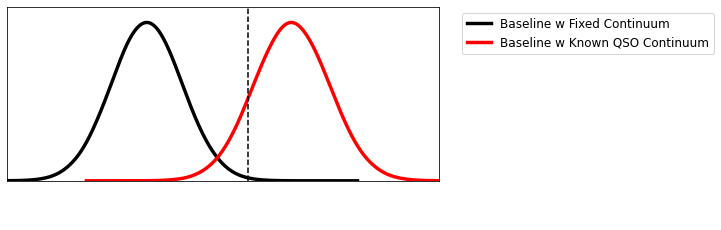

In [5]:
g = getdist.plots.getSinglePlotter(width_inch=12)
g.plot_1d([chain1, chain15], 'phi_smooth')
g.add_legend([r'Baseline w Fixed Continuum', r'Baseline w Known QSO Continuum'], bbox_to_anchor=(0, 0, 1.65, 1))
g.fig.axes[0].axvline(1, color='k', ls='--')

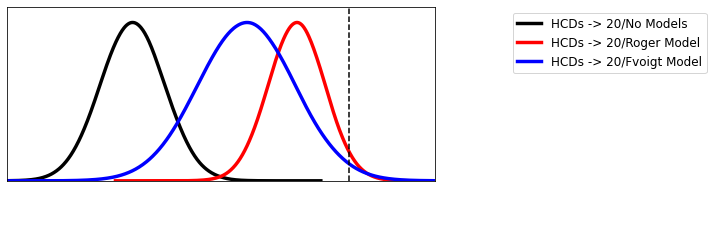

In [6]:
g = getdist.plots.getSinglePlotter(width_inch=12)
g.plot_1d([chain5, chain7, chain6], 'phi_smooth')
g.add_legend([r'HCDs -> 20/No Models', r'HCDs -> 20/Roger Model', r'HCDs -> 20/Fvoigt Model'], bbox_to_anchor=(0, 0, 1.65, 1))
g.fig.axes[0].axvline(1, color='k', ls='--')

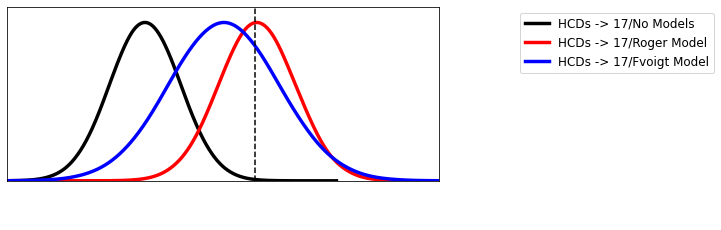

In [7]:
g = getdist.plots.getSinglePlotter(width_inch=12)
g.plot_1d([chain2, chain4, chain3], 'phi_smooth')
g.add_legend([r'HCDs -> 17/No Models', r'HCDs -> 17/Roger Model', r'HCDs -> 17/Fvoigt Model'], bbox_to_anchor=(0, 0, 1.65, 1))
g.fig.axes[0].axvline(1, color='k', ls='--')

## 10 Mpc vs 25 Mpc

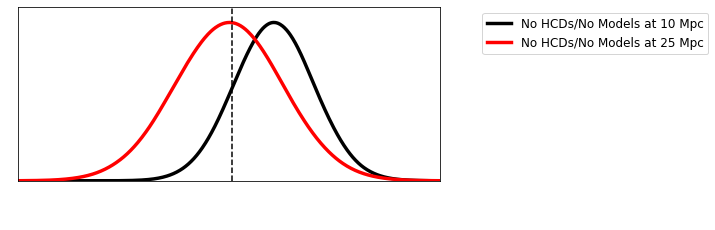

In [8]:
g = getdist.plots.getSinglePlotter(width_inch=12)
g.plot_1d([chain21, chain18], 'phi_smooth')
g.add_legend([r'No HCDs/No Models at 10 Mpc', r'No HCDs/No Models at 25 Mpc'], bbox_to_anchor=(0, 0, 1.65, 1))
g.fig.axes[0].axvline(1, color='k', ls='--')

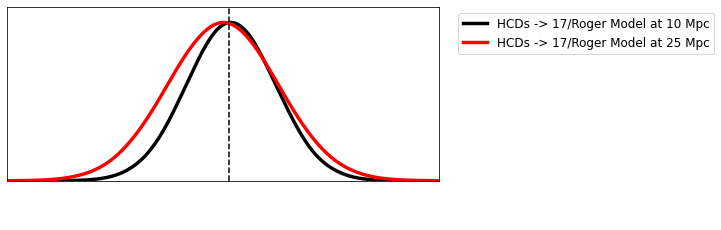

In [9]:
g = getdist.plots.getSinglePlotter(width_inch=12)
g.plot_1d([chain4, chain30], 'phi_smooth')
g.add_legend([r'HCDs -> 17/Roger Model at 10 Mpc', r'HCDs -> 17/Roger Model at 25 Mpc'], bbox_to_anchor=(0, 0, 1.65, 1))
g.fig.axes[0].axvline(1, color='k', ls='--')

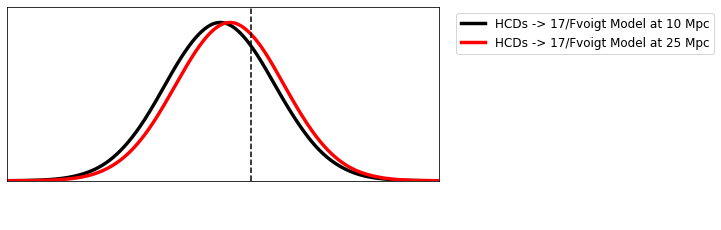

In [10]:
g = getdist.plots.getSinglePlotter(width_inch=12)
g.plot_1d([chain3, chain31], 'phi_smooth')
g.add_legend([r'HCDs -> 17/Fvoigt Model at 10 Mpc', r'HCDs -> 17/Fvoigt Model at 25 Mpc'], bbox_to_anchor=(0, 0, 1.65, 1))
g.fig.axes[0].axvline(1, color='k', ls='--')

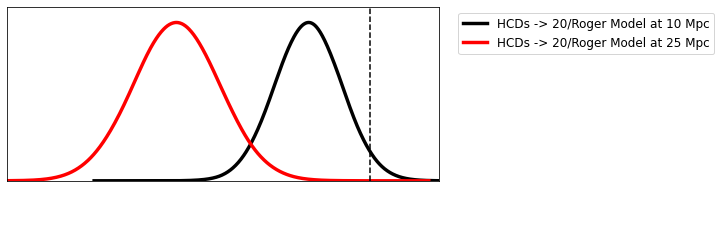

In [11]:
g = getdist.plots.getSinglePlotter(width_inch=12)
g.plot_1d([chain7, chain32], 'phi_smooth')
g.add_legend([r'HCDs -> 20/Roger Model at 10 Mpc', r'HCDs -> 20/Roger Model at 25 Mpc'], bbox_to_anchor=(0, 0, 1.65, 1))
g.fig.axes[0].axvline(1, color='k', ls='--')

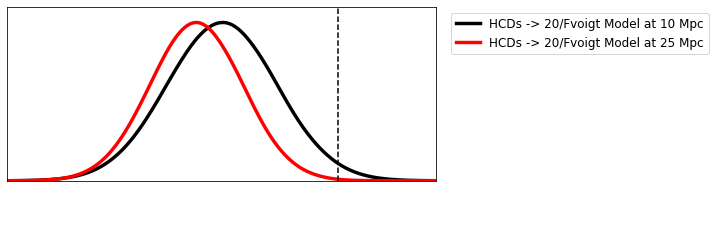

In [12]:
g = getdist.plots.getSinglePlotter(width_inch=12)
g.plot_1d([chain6, chain33], 'phi_smooth')
g.add_legend([r'HCDs -> 20/Fvoigt Model at 10 Mpc', r'HCDs -> 20/Fvoigt Model at 25 Mpc'], bbox_to_anchor=(0, 0, 1.65, 1))
g.fig.axes[0].axvline(1, color='k', ls='--')

## Comparing Roger and Fvoigt Models

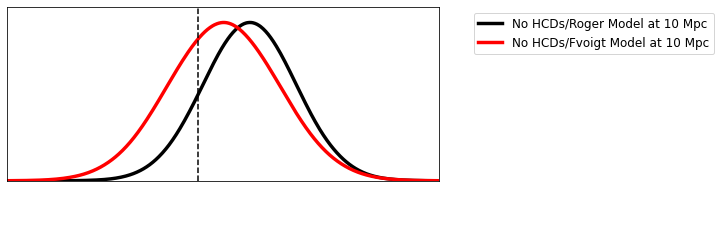

In [13]:
g = getdist.plots.getSinglePlotter(width_inch=12)
g.plot_1d([chain34, chain35], 'phi_smooth')
g.add_legend([r'No HCDs/Roger Model at 10 Mpc', r'No HCDs/Fvoigt Model at 10 Mpc'], bbox_to_anchor=(0, 0, 1.65, 1))
g.fig.axes[0].axvline(1, color='k', ls='--')

## No Models Alpha S

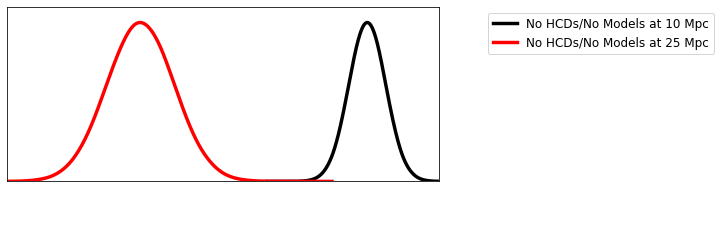

In [14]:
g = getdist.plots.getSinglePlotter(width_inch=12)
g.plot_1d([chain21, chain18], 'alpha_smooth')
g.add_legend([r'No HCDs/No Models at 10 Mpc', r'No HCDs/No Models at 25 Mpc'], bbox_to_anchor=(0, 0, 1.65, 1))
g.fig.axes[0].axvline(1, color='k', ls='--')

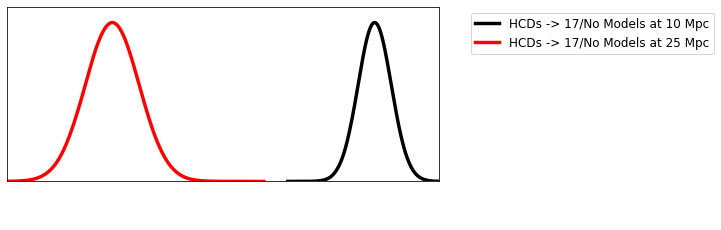

In [15]:
g = getdist.plots.getSinglePlotter(width_inch=12)
g.plot_1d([chain25, chain22], 'alpha_smooth')
g.add_legend([r'HCDs -> 17/No Models at 10 Mpc', r'HCDs -> 17/No Models at 25 Mpc'], bbox_to_anchor=(0, 0, 1.65, 1))
g.fig.axes[0].axvline(1, color='k', ls='--')

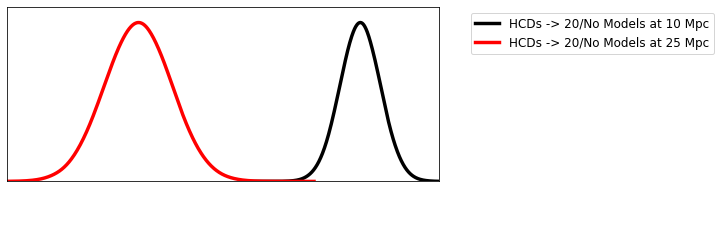

In [16]:
g = getdist.plots.getSinglePlotter(width_inch=12)
g.plot_1d([chain29, chain26], 'alpha_smooth')
g.add_legend([r'HCDs -> 20/No Models at 10 Mpc', r'HCDs -> 20/No Models at 25 Mpc'], bbox_to_anchor=(0, 0, 1.65, 1))
g.fig.axes[0].axvline(1, color='k', ls='--')